
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 1 <br>
</div>


---



### Full Name : Leili Motahari
### Student Number : 
___

## Introduction

In this assignment, we are going to investigate some of the basic methods of image enhancement.

## Section 1: Image Enhancement

Importing necessary Libraries. You cannot import and use any other libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

### Q1: Intensity Enhancement


In this question, you will implement some of the intensity processing functions and apply them on a given image. In the final part, you will be asked to use these functions to enhance the intensity of a given image.

<ol>
<li>
 <b>Negative Transform :</b> $y=255-x$

 <li>
 <b>Log Transform :</b> $y=\frac{255 \log(1+ \alpha x)}{\log(1+255 \alpha)}$

 <li>
 <b>Gamma Transform :</b> $y=255(\frac{x}{255})^{\gamma}$

 </ol>

In the following cells, complete the functions for

In [78]:
def negative_transform(img: np.ndarray):
  
  negative_img = 255 - img
  return negative_img

In [79]:
def log_transform(img: np.ndarray, alpha):
    log_image = 255 * (np.log(1 + alpha * img) / np.log(1 + 255 * alpha))

    return log_image.astype(np.uint8)  #


In [80]:
def gamma_transform(img: np.ndarray, gamma):
    img = img.astype(np.float32) / 255.0
    gamma_corrected = np.power(img, gamma) * 255.0

    return gamma_corrected.astype(np.uint8)  

Now, apply these transformations on `Q1-input1.jpg` (on RGB channels) and save the output images in `Q1-output-neg.jpg`, `Q1-output-log.jpg` and `Q1-output-gamma.jpg`, respectively. You can set $\alpha$ and $\gamma$ whatever you want, but effect on the intensity of the image should be noticable.

In [81]:
img =cv2.imread('Q1-input1.jpg')
# TODO: apply the transformations and save the results
print(type(img))

<class 'numpy.ndarray'>


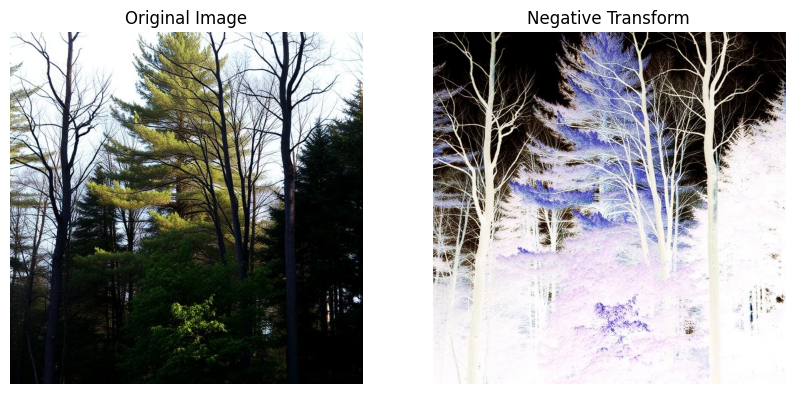

In [82]:
negative_image = negative_transform(img)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# axes[0].imshow(img, cmap="gray")
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

# axes[1].imshow(negative_image, cmap="gray")
axes[1].imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Negative Transform")
axes[1].axis("off")
plt.show()
fig.savefig("results/Q1\Q1-output-neg.jpg")

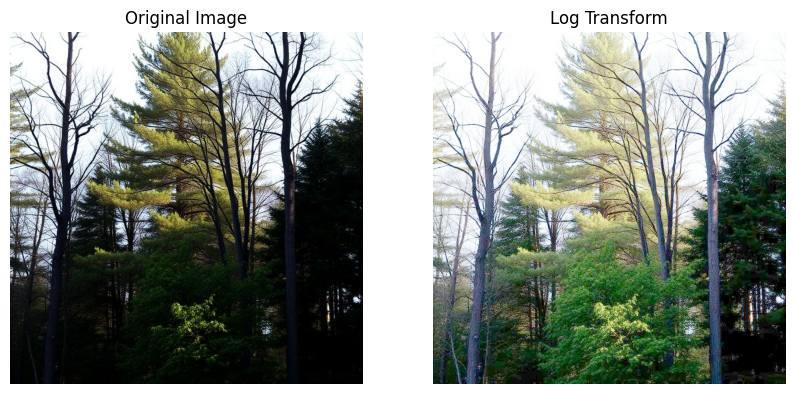

In [9]:
alpha = 0.25
log_image_color = log_transform(img, alpha)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(log_image_color, cv2.COLOR_BGR2RGB))
axes[1].set_title("Log Transform")
axes[1].axis("off")

plt.show()
fig.savefig("results/Q1\Q1-output-log.jpg")

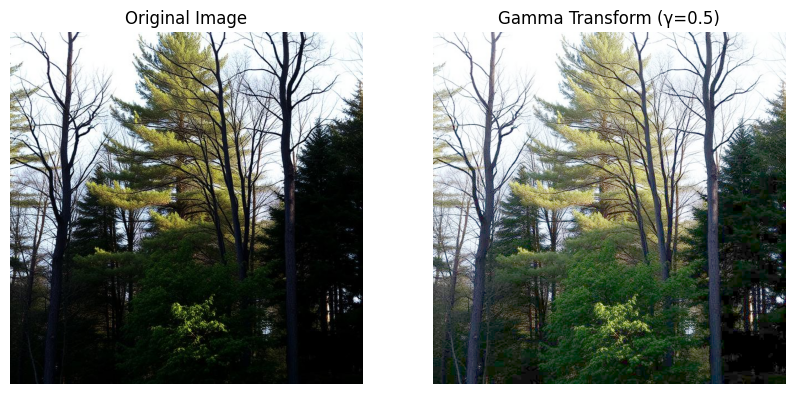

In [83]:
gamma_value = 0.5  #less than 1 brighter and greater darker
gamma_image_color = gamma_transform(img, gamma_value)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(gamma_image_color, cv2.COLOR_BGR2RGB))
axes[1].set_title(f"Gamma Transform (γ={gamma_value})")
axes[1].axis("off")

plt.show()
fig.savefig("results/Q1\Q1-output-gamma.jpg")

Finally, use the functions you implemented to enhance the intensity of `Q1-input2.jpg`. You may use any of the functions in anyway you desire. Your final score on the question depends on the quality of the output. Save the output image as `Q1-output-enhanced.jpg`.

In [84]:
img =cv2.imread('Q1-input2.jpg')
# TODO: enhance the intensity of the input image


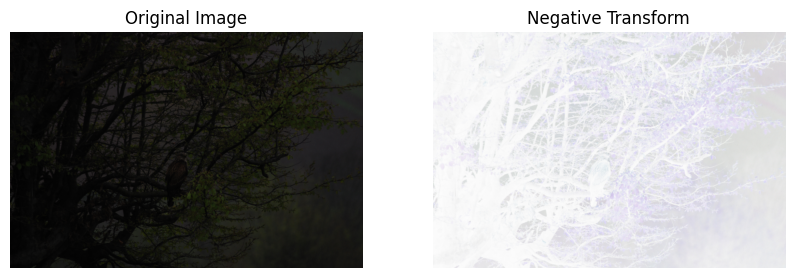

In [85]:
negative_image = negative_transform(img)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# axes[0].imshow(img, cmap="gray")
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

# axes[1].imshow(negative_image, cmap="gray")
axes[1].imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Negative Transform")
axes[1].axis("off")
plt.show()
# fig.savefig("results/Q1\Q1-output-enhanced.jpg")

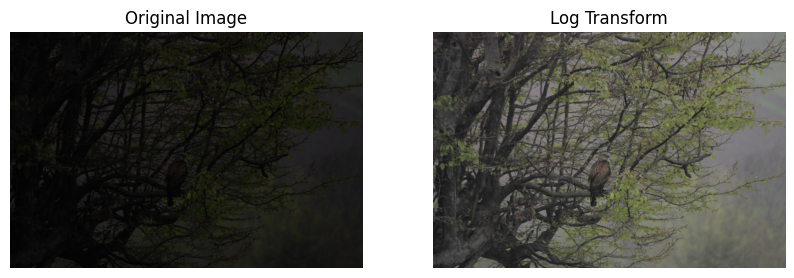

In [86]:
alpha = 0.15
log_image_color = log_transform(img, alpha)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(log_image_color, cv2.COLOR_BGR2RGB))
axes[1].set_title("Log Transform")
axes[1].axis("off")

plt.show()
fig.savefig("results/Q1\Q1-output-enhanced.jpg")

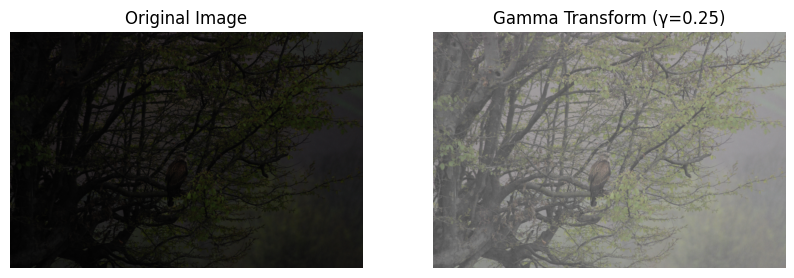

In [87]:
gamma_value = 0.25  
gamma_image_color = gamma_transform(img, gamma_value)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(gamma_image_color, cv2.COLOR_BGR2RGB))
axes[1].set_title(f"Gamma Transform (γ={gamma_value})")
axes[1].axis("off")

plt.show()
# fig.savefig("results/Q1\Q1-output-enhanced.jpg")

### Q2: Histogram Specification


In this question, we will implement histogram specification for intensity enhancement.

Complete the following code to specify the histogram of the input image, with a given histogram `hist1`, to target histogram `hist2`.

**Note**: Assume that the input image has only one channel, i.e, it is a $H \times W$ numpy array.

To test the above code, open `Q2-input1.jpg` and `Q2-input2.jpg`, and convert the histogram of the first one to the second one. Save the resulting image as `Q2-output.jpg`. The aim of specifying the histograms is to enhance the first image, so your score depends on the quality of your result.

In [91]:
def histogram_specification_single_channel(src_channel, ref_channel):
    hist_src, _ = np.histogram(src_channel.flatten(), 256, [0,256])
    hist_ref, _ = np.histogram(ref_channel.flatten(), 256, [0,256])
    
    cdf_src = np.cumsum(hist_src).astype(np.float64)
    cdf_src /= cdf_src[-1]
    cdf_ref = np.cumsum(hist_ref).astype(np.float64)
    cdf_ref /= cdf_ref[-1]
    
    mapping = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        diff = np.abs(cdf_src[i] - cdf_ref)
        mapping[i] = np.argmin(diff)
    
    return mapping[src_channel]

def histogram_specification_color(src_img, ref_img):
    b_src, g_src, r_src = cv2.split(src_img)
    b_ref, g_ref, r_ref = cv2.split(ref_img)
  
    b_out = histogram_specification_single_channel(b_src, b_ref)
    g_out = histogram_specification_single_channel(g_src, g_ref)
    r_out = histogram_specification_single_channel(r_src, r_ref)
    return cv2.merge([b_out, g_out, r_out])



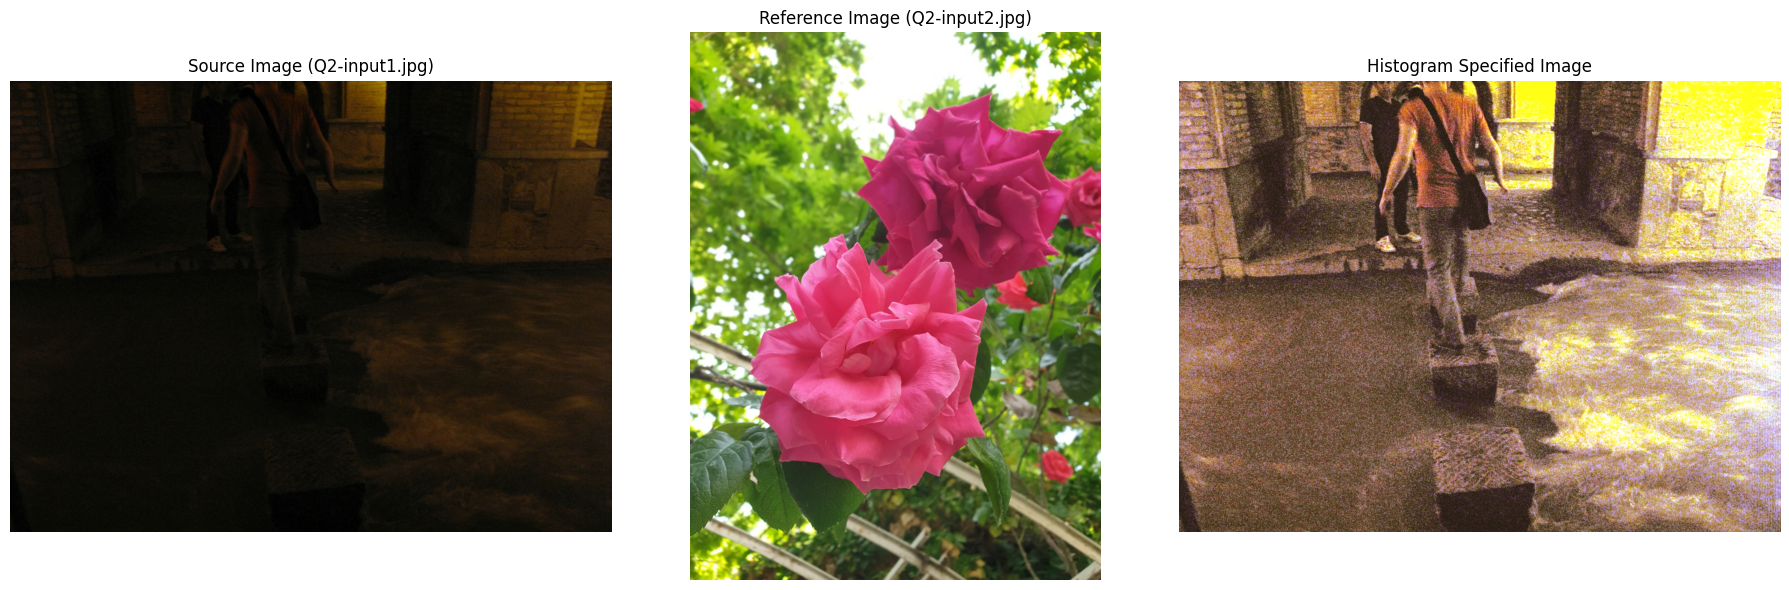

In [92]:
img1 = cv2.imread('Q2-input1.jpg')  
img2 = cv2.imread('Q2-input2.jpg')  

output_img = histogram_specification_color(img1, img2)
output_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0].set_title("Source Image (Q2-input1.jpg)")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1].set_title("Reference Image (Q2-input2.jpg)")
axes[1].axis("off")

axes[2].imshow(output_rgb)
axes[2].set_title("Histogram Specified Image")
axes[2].axis("off")

plt.tight_layout()
plt.show()
fig.savefig("results/Q2\Q2-output.jpg")

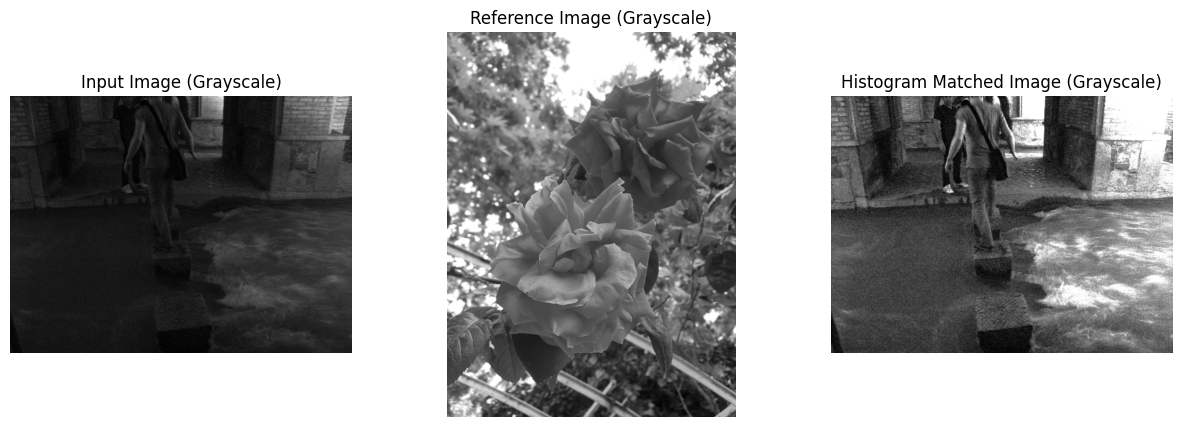

In [93]:
# Read both images in GRAYSCALE mode
img1 = cv2.imread('Q2-input1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Q2-input2.jpg', cv2.IMREAD_GRAYSCALE)

output_img = histogram_specification_single_channel(img1,img2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img1, cmap="gray")
axes[0].set_title("Input Image (Grayscale)")
axes[0].axis("off")

axes[1].imshow(img2, cmap="gray")
axes[1].set_title("Reference Image (Grayscale)")
axes[1].axis("off")

axes[2].imshow(output_img, cmap="gray")
axes[2].set_title("Histogram Matched Image (Grayscale)")
axes[2].axis("off")

plt.show()
fig.savefig("results/Q2\Q2-output-grayscale.jpg")


### Q3: Color Processing

In image `Q3-input.jpg`, change the color of the flowers red, blue and yellow to violet, pink and orange respectively. Save the result as `Q3-output.jpg`. Your score of this question depends on the quality of the output image.

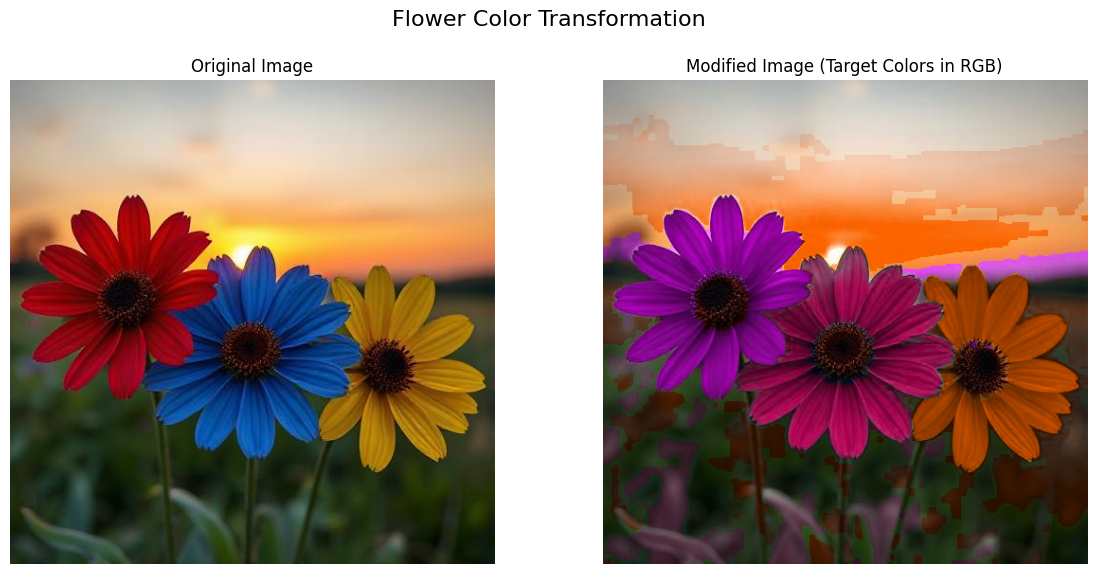

In [94]:
# I tried various methods to have a better result.Another code is available in Q3 for this section using masking step by step, changing flower colors and then merge to the input image.

output_image = 'results\Q3\Q3-output-V1.png' 


target_rgb_purple = (65, 4, 69)
target_rgb_pink = (238, 102, 166)
target_rgb_orange = (235, 91, 0)

target_hsv_purple = cv2.cvtColor(np.uint8([[list(target_rgb_purple)]]), cv2.COLOR_RGB2HSV)[0][0][0]
target_hsv_pink = cv2.cvtColor(np.uint8([[list(target_rgb_pink)]]), cv2.COLOR_RGB2HSV)[0][0][0]
target_hsv_orange = cv2.cvtColor(np.uint8([[list(target_rgb_orange)]]), cv2.COLOR_RGB2HSV)[0][0][0]

lower_red1 = np.array([0, 60, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 60, 50])
upper_red2 = np.array([180, 255, 255])

lower_blue = np.array([55, 15, 45]) 
upper_blue = np.array([150, 255, 255])

lower_yellow = np.array([15, 40, 40])
upper_yellow = np.array([45, 255, 255])

kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)

orange_saturation_boost_factor = 1.4
orange_min_saturation = 70
# orange_value_adjust_factor = 0.95 

img = cv2.imread('Q3-input.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_CLOSE, kernel)
mask_yellow = cv2.morphologyEx(mask_yellow, cv2.MORPH_OPEN, kernel)
mask_yellow = cv2.morphologyEx(mask_yellow, cv2.MORPH_CLOSE, kernel)


hsv[mask_red > 0, 0] = target_hsv_purple
hsv[mask_blue > 0, 0] = target_hsv_pink
yellow_pixel_indices = (mask_yellow > 0)
num_yellow_pixels = np.sum(yellow_pixel_indices)

hsv[yellow_pixel_indices, 0] = target_hsv_orange
original_s = hsv[yellow_pixel_indices, 1]
new_s = np.clip(original_s * orange_saturation_boost_factor, orange_min_saturation, 255)
hsv[yellow_pixel_indices, 1] = new_s.astype(np.uint8)

output_bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# cv2.imwrite(output_image_path_cv2, output_bgr)
output_rgb = cv2.cvtColor(output_bgr, cv2.COLOR_BGR2RGB)
original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(output_rgb)
plt.title('Modified Image (Target Colors in RGB)') 
plt.axis('off')
plt.suptitle('Flower Color Transformation', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(output_image, bbox_inches='tight')
plt.show()

## Section 2: Spatial Filters

### Q4: Blurring

In this question, you are going to implement a function to blur a given image using a specified method. Your function should support box filter, gaussian filter and median filter. It is permitted to use `opencv` to perform the bluring.

In [30]:
def blur(img: np.ndarray, kernel_size: int, filter_type: str):
 
    if filter_type == 'box':
        blurred_img = cv2.blur(img, (kernel_size, kernel_size))
    elif filter_type == 'gaussian':
        ksize = (kernel_size, kernel_size)
        sigmaX = 0  
        blurred_img = cv2.GaussianBlur(img, ksize, sigmaX)
    elif filter_type == 'median':
        if kernel_size % 2 == 0:
            kernel_size += 1 
        blurred_img = cv2.medianBlur(img, kernel_size)
    else:
        raise ValueError(f"Unsupported filter type: {filter_type}. Choose from 'box', 'gaussian', or 'median'.")
    return blurred_img


Test your code with kernel size $k=3, 11, 25$ for each of filters on `Q4-input.jpg`. Save the output images with the following format:
<ul>
<li> Box filter with kernel size $k=3, 11, 25$ as Q4-output-box3.jpg, Q4-output-box11.jpg and Q4-output-box25.jpg.

<li> Gaussian filter with kernel size $k=3, 11, 25$ as Q4-output-gauss3.jpg, Q4-output-gauss11.jpg and Q4-output-gauss25.jpg (you can set $\sigma$ whaever you wish, but blurring should be observable).

<li> Median filter with kernel size $k=3, 11, 25$ as Q4-output-med3.jpg, Q4-output-med11.jpg and Q4-output-med25.jpg.
</ul>

In [31]:
import os
img=cv2.imread('Q4-input.jpg')
output_dir = 'results\Q4'  
kernel_sizes = [3, 11, 25]
filter_types = ['box', 'gaussian', 'median']
for filter_type in filter_types:
    for k in kernel_sizes:
        output_filename = f'Q4-output-{filter_type}{k}.jpg'
        output_path = os.path.join(output_dir, output_filename)

        blurred_image = blur(img.copy(), k, filter_type)
        cv2.imwrite(output_path, blurred_image)
        print(f"Saved {filter_type} blurred image with kernel size {k} to {output_path}")
    
# plt.figure(figsize=(15, 10))
# plt.subplot(4, 3, 1)
# original_img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(original_img_rgb)
# plt.title('Original Image')
# plt.axis('off')

# plot_index = 4

# for i, filter_type in enumerate(filter_types):
#     for j, k in enumerate(kernel_sizes):
#         output_path = f'Q4-output-{filter_type}{k}.jpg'
#         blurred_img_bgr = cv2.imread(output_path)
#         if blurred_img_bgr is not None:
#             blurred_img_rgb = cv2.cvtColor(blurred_img_bgr, cv2.COLOR_BGR2RGB)
#             plt.subplot(4, 3, plot_index)
#             plt.imshow(blurred_img_rgb)
#             plt.title(f'{filter_type.capitalize()} (k={k})')
#             plt.axis('off')
#             plot_index += 1

# plt.tight_layout()
# plt.suptitle('Image Blurring with Different Filters and Kernel Sizes', fontsize=16)
# plt.subplots_adjust(top=0.9)
# plt.show()

Saved box blurred image with kernel size 3 to results\Q4\Q4-output-box3.jpg
Saved box blurred image with kernel size 11 to results\Q4\Q4-output-box11.jpg
Saved box blurred image with kernel size 25 to results\Q4\Q4-output-box25.jpg
Saved gaussian blurred image with kernel size 3 to results\Q4\Q4-output-gaussian3.jpg
Saved gaussian blurred image with kernel size 11 to results\Q4\Q4-output-gaussian11.jpg
Saved gaussian blurred image with kernel size 25 to results\Q4\Q4-output-gaussian25.jpg
Saved median blurred image with kernel size 3 to results\Q4\Q4-output-median3.jpg
Saved median blurred image with kernel size 11 to results\Q4\Q4-output-median11.jpg
Saved median blurred image with kernel size 25 to results\Q4\Q4-output-median25.jpg


### Q5: Sharpening

In this question, you are going to sharpen a given image using Gaussian Filter.


Let $f$ be the source image and $g$ be the Gaussian kernel, then $f*g$ is the convolution of the image with this kernel, which results in a blurred image.

To sharpen the image, we can generate an unsharp mask by subtracting the blurred image from the original image:
$$m=f-f*g$$
This mask is a transparent image which has higher intensity on the edges of the original image. Now we may add this mask with a weight $\alpha$ to sharpen the original image:
$$f'=f+ \alpha m$$

First, complete the following function to generate a Gaussian kernel with a given size and $\sigma$. A $(2k+1) \times (2k+1)$ Gaussian kernel has the value $e^{\frac{-(x^2+y^2)}{2 \sigma^2}}$ at point $(x,y)$ (Center of the kernel has coordinates $(0,0)$, and we have $x,y \in [-k,k]$). You should also normalize the kernel (sum of the entries should app up to 1)

In [43]:
def gaussian_kernel(kernel_size: int, sigma: float):
    k = kernel_size // 2
    x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel.astype(np.float32)

Next, complete the following function to sharpen a given image and Gaussian kernel and $\alpha$. Your function should return both the sharpened image and the unsharp mask.

In [44]:
def gaussian_sharpen(image: np.ndarray, kernel: np.ndarray, alpha: float):
    image = image.astype(np.float32)
    blurred = cv2.filter2D(image, -1, kernel)
    unsharp_mask = image - blurred
    sharpened = cv2.addWeighted(image, 1, unsharp_mask, alpha, 0)
    unsharp_mask_disp = cv2.normalize(unsharp_mask, None, 0, 255, cv2.NORM_MINMAX)
    return np.clip(sharpened, 0, 255).astype(np.uint8), unsharp_mask_disp.astype(np.uint8)

Now to test your code, open `Q5-input.jpg` and sharpen it using the above function. Use a kernel size of 7 and choose a suitable value of $\sigma$ and $\alpha$ to get a desirable result. Save the sharpened image as `Q5-output-1.jpg` and the unsharp mask (grayscale image) as `Q5-output-2.jpg`. Your score on this part depends on the quality of the result.

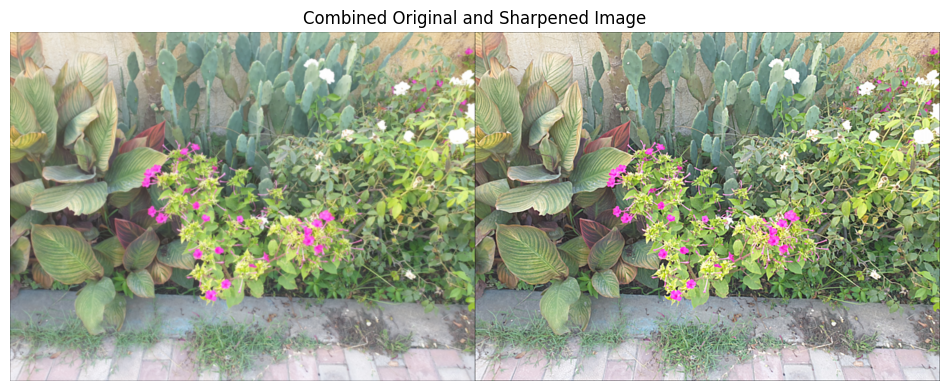

In [76]:
import numpy as np
import cv2

def gaussian_kernel(kernel_size: int, sigma: float):
    k = kernel_size // 2
    x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel.astype(np.float32)

def gaussian_sharpen(image: np.ndarray, kernel: np.ndarray, alpha: float):
    image = image.astype(np.float32)
    blurred = cv2.filter2D(image, -1, kernel)
    unsharp_mask = image - blurred
    sharpened = cv2.addWeighted(image, 1, unsharp_mask, alpha, 0)
    unsharp_mask_disp = cv2.normalize(unsharp_mask, None, 0, 255, cv2.NORM_MINMAX)
    return np.clip(sharpened, 0, 255).astype(np.uint8), unsharp_mask_disp.astype(np.uint8)

image_path = "Q5-input.png"
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image could not be loaded.")
kernel_size = 7
sigma = 1.5
alpha = 1.5
kernel = gaussian_kernel(kernel_size, sigma)
sharpened_img, unsharp_mask = gaussian_sharpen(img, kernel, alpha)
unsharp_mask_gray = cv2.cvtColor(unsharp_mask, cv2.COLOR_BGR2GRAY)  
unsharp_mask_disp = cv2.normalize(unsharp_mask_gray, None, 0, 255, cv2.NORM_MINMAX)  
cv2.imwrite("results\Q5\Q5-output-1.jpg", sharpened_img)
cv2.imwrite("results\Q5\Q5-output-2.jpg", unsharp_mask)
combined = np.hstack((img, sharpened_img))
cv2.imwrite("results\Q5\Q5-combined_image.jpg", combined)
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,6))
plt.imshow(combined_rgb)
plt.axis("off")
plt.title("Combined Original and Sharpened Image")
plt.show()


### Q6: Noise removal

## A) ACE Function
Implement the ACE function using ready-made functions for histogram equalization and padding. Apply the function with different grid sizes on ACE.jpg image and report the output for each one. Also specify which output is the best.

## B) CLAHE Function
Implement the CLAHE function and apply it to CLAHE.jpg image. Also specify which output is the best. In this function, test different values for the clipping threshold and grid size, analyze the effect of each, and output the best result.

## C) add_noise Function
Complete the add_noise function to add Gaussian or Salt-and-Pepper noise to the image. Using existing library functions is not allowed. Read the noise.tif image in grayscale and add Gaussian and Salt-and-Pepper noise separately to the image and display the output.

## D) denoise Function
Save the image resulting from adding Salt-and-Pepper noise and denoise it using an appropriate filter.

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ACE(image, gridSize):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=gridSize)
    output = clahe.apply(gray)

    return output


Saved results\ACE\ACE_output_4x4.jpg
Saved results\ACE\ACE_output_8x8.jpg
Saved results\ACE\ACE_output_16x16.jpg


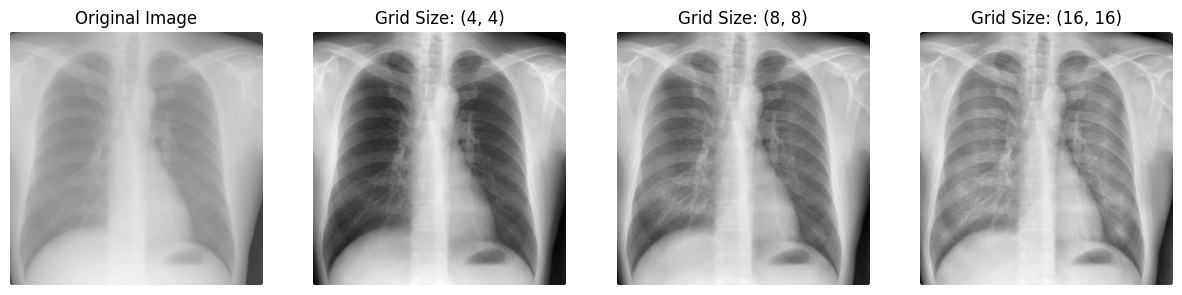

In [56]:
image_path = "ACE.jpg"  
image = cv2.imread(image_path)

grid_sizes = [(4, 4), (8, 8), (16, 16)]
results = {size: ACE(image, size) for size in grid_sizes}

for size, result in results.items():
    output_filename = f"results\ACE\ACE_output_{size[0]}x{size[1]}.jpg"
    cv2.imwrite(output_filename, result)
    print(f"Saved {output_filename}")

fig, axes = plt.subplots(1, len(grid_sizes) + 1, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

for i, gridSize in enumerate(grid_sizes):
    enhanced_image = results[gridSize]
    axes[i + 1].imshow(enhanced_image, cmap="gray")
    axes[i + 1].set_title(f"Grid Size: {gridSize}")
    axes[i + 1].axis("off")

plt.show()

In [64]:
def CLAHE(image, gridSize, threshold):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    clahe = cv2.createCLAHE(clipLimit=threshold, tileGridSize=gridSize)
    output = clahe.apply(gray)

    return output

Saved results\CLAHE\CLAHE_output_4x4_T2.0.jpg
Saved results\CLAHE\CLAHE_output_4x4_T3.0.jpg
Saved results\CLAHE\CLAHE_output_4x4_T4.0.jpg
Saved results\CLAHE\CLAHE_output_8x8_T2.0.jpg
Saved results\CLAHE\CLAHE_output_8x8_T3.0.jpg
Saved results\CLAHE\CLAHE_output_8x8_T4.0.jpg
Saved results\CLAHE\CLAHE_output_16x16_T2.0.jpg
Saved results\CLAHE\CLAHE_output_16x16_T3.0.jpg
Saved results\CLAHE\CLAHE_output_16x16_T4.0.jpg


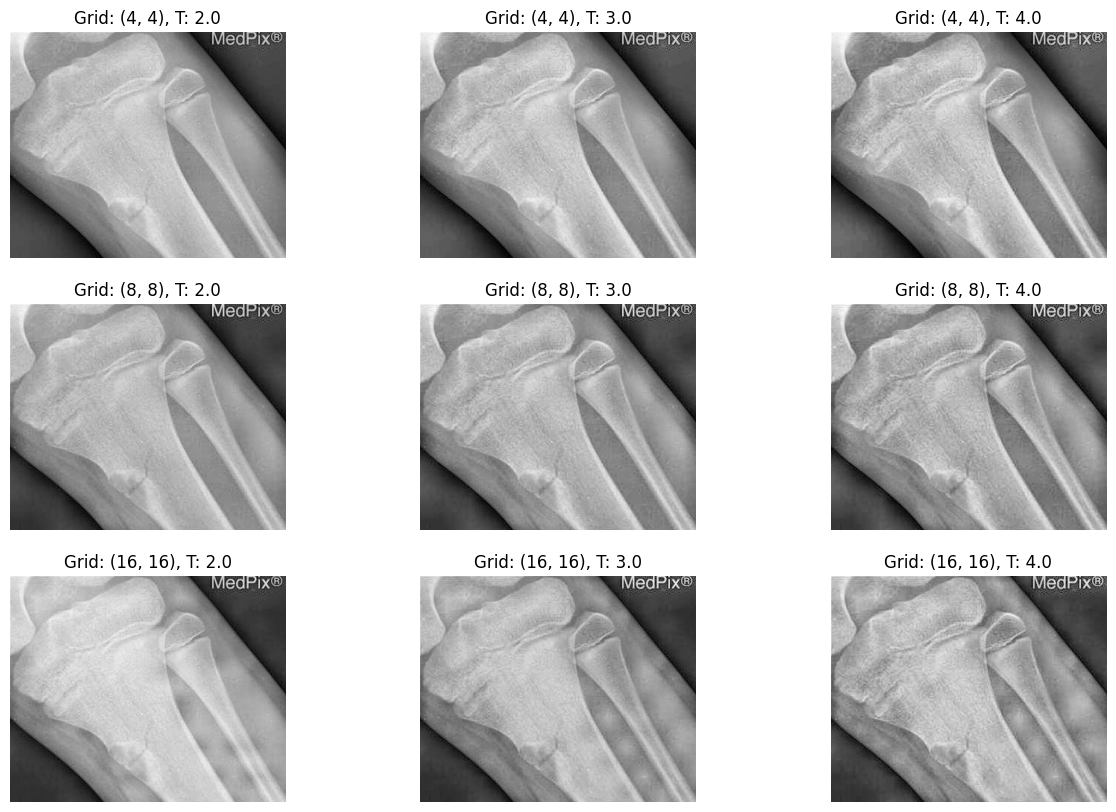

In [61]:
image_path = "CLAHE.jpg"  
image = cv2.imread(image_path)

grid_sizes = [(4, 4), (8, 8), (16, 16)]
thresholds = [2.0, 3.0, 4.0]

results = {}
for grid in grid_sizes:
    for thresh in thresholds:
        results[(grid, thresh)] = CLAHE(image, grid, thresh)

for (grid, thresh), result in results.items():
    output_filename = f"results\CLAHE\CLAHE_output_{grid[0]}x{grid[1]}_T{thresh}.jpg"
    cv2.imwrite(output_filename, result)
    print(f"Saved {output_filename}")


fig, axes = plt.subplots(len(grid_sizes), len(thresholds), figsize=(15, 10))
for i, grid in enumerate(grid_sizes):
    for j, thresh in enumerate(thresholds):
        enhanced_image = results[(grid, thresh)]
        axes[i, j].imshow(enhanced_image, cmap="gray")
        axes[i, j].set_title(f"Grid: {grid}, T: {thresh}")
        axes[i, j].axis("off")

plt.show()


In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_noise(image, noise_type, args):
    output = image.copy()
    
    if noise_type == 0:  # Gaussian Noise
        mean, sigma = args
        gaussian_noise = np.random.normal(mean, sigma, image.shape)
        output = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
    
    elif noise_type == 1:  # Salt-and-Pepper Noise
        prob = args[0]
        rand_matrix = np.random.rand(*image.shape)
        output[rand_matrix < prob] = 0  # Pepper (black)
        output[rand_matrix > 1 - prob] = 255  # Salt (white)
    
    return output

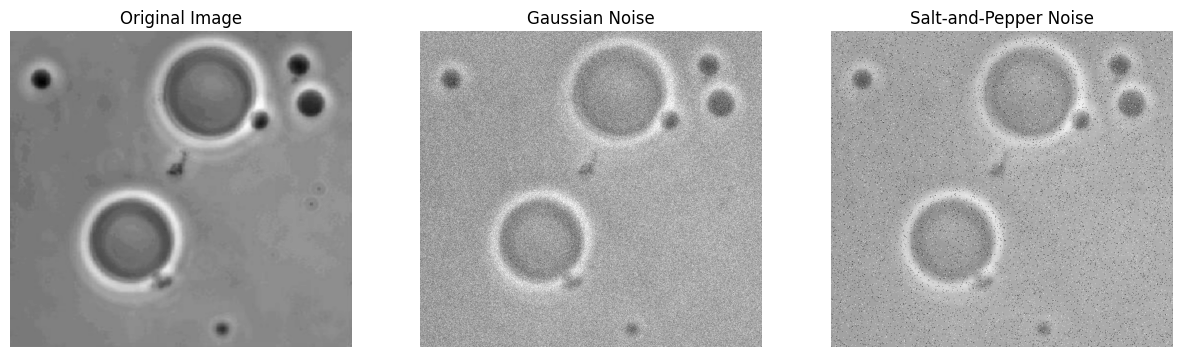

In [ ]:
noise_image_path = "noise.tif"
noise_image = cv2.imread(noise_image_path, cv2.IMREAD_GRAYSCALE)

gaussian_noisy_image = add_noise(noise_image, 0, [0, 25])
cv2.imwrite("results\Noise\gaussian_noisy_image.jpg", gaussian_noisy_image)

sp_noisy_image = add_noise(noise_image, 1, [0.02])
cv2.imwrite("sp_noisy_image.jpg", sp_noisy_image)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(noise_image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(gaussian_noisy_image, cmap="gray")
axes[1].set_title("Gaussian Noise")
axes[1].axis("off")

axes[2].imshow(sp_noisy_image, cmap="gray")
axes[2].set_title("Salt-and-Pepper Noise")
axes[2].axis("off")

plt.show()


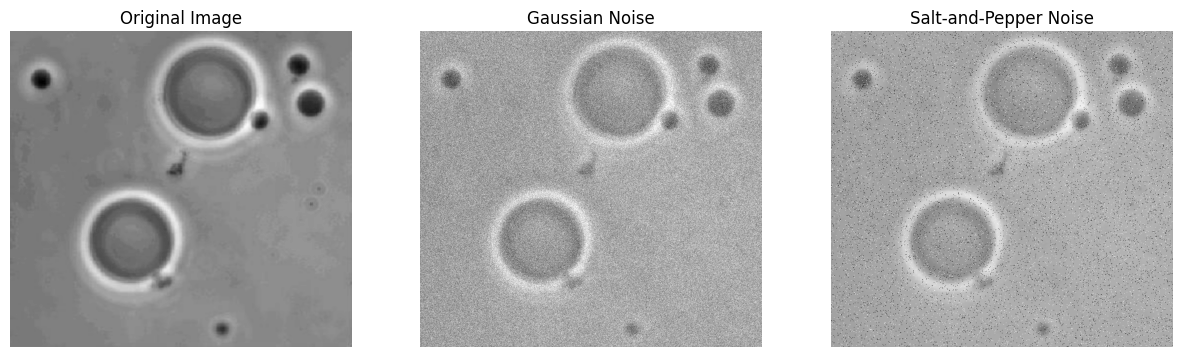

In [ ]:
# To check the result i tried it with available modules too
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

def add_noise(image, noise_type, args):
    image_norm = image.astype(np.float64) / 255.0

    if noise_type == 0:  # Gaussian Noise
        mean, sigma = args
        var = (sigma / 255.0) ** 2
        noisy = random_noise(image_norm, mode='gaussian', mean=mean, var=var)
        output = np.uint8(noisy * 255)
    
    elif noise_type == 1:  # Salt-and-Pepper Noise
        prob = args[0]
        amount = min(2 * prob, 1.0)
        noisy = random_noise(image_norm, mode='s&p', amount=amount)
        output = np.uint8(noisy * 255)
 
    
    return output
noise_image_path = "noise.tif"
noise_image = cv2.imread(noise_image_path, cv2.IMREAD_GRAYSCALE)

gaussian_noisy_image = add_noise(noise_image, 0, [0, 25])
cv2.imwrite("results\Noise\gaussian_noisy_image.jpg", gaussian_noisy_image)

sp_noisy_image = add_noise(noise_image, 1, [0.02])
cv2.imwrite("results\Noise\sp_noisy_image.jpg", sp_noisy_image)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(noise_image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(gaussian_noisy_image, cmap="gray")
axes[1].set_title("Gaussian Noise")
axes[1].axis("off")

axes[2].imshow(sp_noisy_image, cmap="gray")
axes[2].set_title("Salt-and-Pepper Noise")
axes[2].axis("off")

plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_11204\2207688525.py:66: RuntimeWarning: overflow encountered in scalar subtract
  B2 = z_xy - z_max


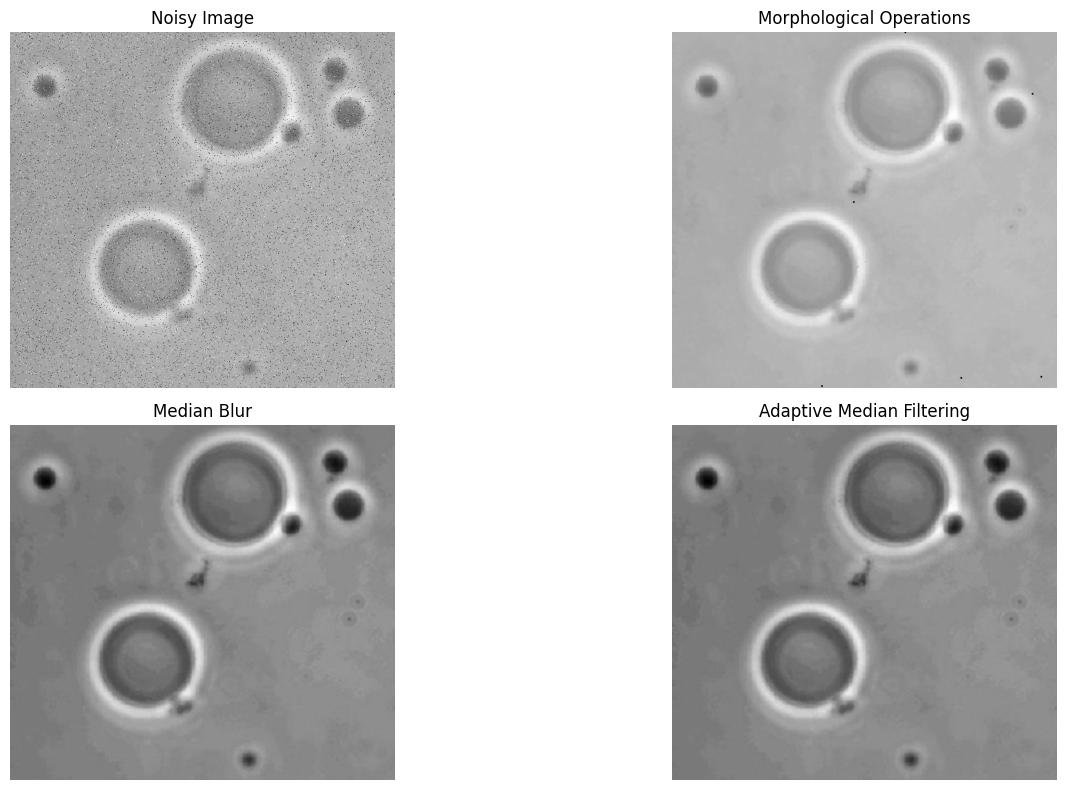

In [ ]:
# I used different denoise operations to find the best one based on this site :
#https://medium.com/@abhishekjainindore24/salt-and-pepper-noise-and-how-to-remove-it-in-machine-learning-032d76b138a5

def denoise_morphological(noisy_image):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opened = cv2.morphologyEx(noisy_image, cv2.MORPH_OPEN, kernel)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    return closed

def denoise_median(noisy_image):
    return cv2.medianBlur(noisy_image, 3)

def adaptive_median_filter(noisy_image, max_window_size=7):
    pad = max_window_size // 2
    padded_image = cv2.copyMakeBorder(noisy_image, pad, pad, pad, pad, cv2.BORDER_REFLECT)
    output = np.zeros_like(noisy_image)
    rows, cols = noisy_image.shape

    for i in range(rows):
        for j in range(cols):
            window_size = 3
            while True:
                half_size = window_size // 2
                r_min = i + pad - half_size
                r_max = i + pad + half_size + 1
                c_min = j + pad - half_size
                c_max = j + pad + half_size + 1
                window = padded_image[r_min:r_max, c_min:c_max]
                
                z_min = window.min()
                z_max = window.max()
                z_med = np.median(window)
                
                A1 = z_med - z_min
                A2 = z_med - z_max
                if A1 > 0 and A2 < 0:
                    z_xy = padded_image[i + pad, j + pad]
                    B1 = z_xy - z_min
                    B2 = z_xy - z_max
                    if B1 > 0 and B2 < 0:
                        output[i, j] = z_xy
                    else:
                        output[i, j] = z_med
                    break
                else:
                    window_size += 2
                    if window_size > max_window_size:
                        output[i, j] = z_med
                        break
    return output

noisy_image = cv2.imread("results\Noise\sp_noisy_image.jpg", cv2.IMREAD_GRAYSCALE)
denoised_morph = denoise_morphological(noisy_image)
denoised_median = denoise_median(noisy_image)
denoised_adaptive = adaptive_median_filter(noisy_image, max_window_size=7)

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(denoised_morph, cmap='gray')
plt.title("Morphological Operations")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(denoised_median, cmap='gray')
plt.title("Median Blur")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(denoised_adaptive, cmap='gray')
plt.title("Adaptive Median Filtering")
plt.axis('off')

plt.tight_layout()
plt.show()
